In [1]:
# Gerekli kütüphaneleri yüklüyoruz
import pandas as pd  # Veri işleme kütüphanesi
import numpy as np   # Matematiksel işlemler
import matplotlib.pyplot as plt  # Çizim kütüphanesi
import seaborn as sns # Daha gelişmiş çizim kütüphanesi

# Veriyi okuyoruz
df = pd.read_csv('train.csv')

# Verinin ilk 5 satırını ekrana basıyoruz (Doğru yüklendi mi diye kontrol)
print("Veri Başarıyla Yüklendi! İşte ilk 5 satır:")
df.head()

Veri Başarıyla Yüklendi! İşte ilk 5 satır:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Veri seti hakkında genel bilgi (Satır sayısı, boş veri var mı?)
print("--- Veri Seti Özeti ---")
df.info()

print("\n--- Her Sütundaki Eksik Veri Sayısı ---")
print(df.isnull().sum())

--- Veri Seti Özeti ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Her Sütundaki Eksik Veri Sayısı ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare    

In [3]:
# 1. 'Cabin' sütununu siliyoruz çünkü çok fazla eksik var
df = df.drop(columns=['Cabin'], axis=1)

# 2. 'Age' (Yaş) kısmındaki eksikleri, yaş ortalaması ile dolduruyoruz
yas_ortalamasi = df['Age'].mean()
df['Age'] = df['Age'].fillna(yas_ortalamasi)

# 3. 'Embarked' (Liman) kısmındaki 2 eksik satırı siliyoruz
df = df.dropna()

# Kontrol edelim: Hala eksik var mı?
print("Temizlik sonrası eksik veri sayısı:")
print(df.isnull().sum())

Temizlik sonrası eksik veri sayısı:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


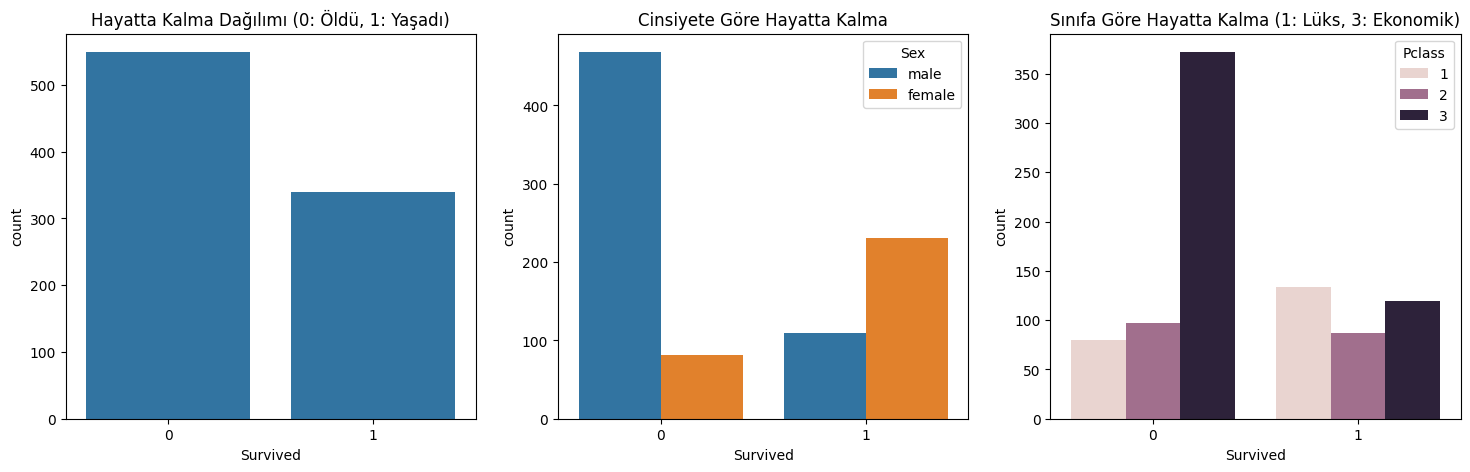

In [4]:
# Grafiklerin boyutunu ayarlayalım
plt.figure(figsize=(18, 5))

# 1. Grafik: Kaç kişi öldü, kaç kişi hayatta kaldı?
plt.subplot(1, 3, 1)
sns.countplot(x='Survived', data=df)
plt.title('Hayatta Kalma Dağılımı (0: Öldü, 1: Yaşadı)')

# 2. Grafik: Cinsiyete göre hayatta kalma durumu
plt.subplot(1, 3, 2)
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Cinsiyete Göre Hayatta Kalma')

# 3. Grafik: Bilet sınıfına (Zenginlik) göre hayatta kalma durumu
plt.subplot(1, 3, 3)
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Sınıfa Göre Hayatta Kalma (1: Lüks, 3: Ekonomik)')

plt.show()

In [5]:
# 1. İşe yaramayan sütunları atıyoruz (İsim, Bilet No, Yolcu ID'si tahmin için gereksiz)
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

# 2. Cinsiyet ve Liman bilgilerini sayıya çeviriyoruz (Dummy Variable Yöntemi)
# Bu işlem 'Sex' sütununu 'Sex_male' (Erkek mi?) ve 'Sex_female' (Kadın mı?) diye ayırır.
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Bakalım tablomuz nasıl görünüyor?
print("Sayısal Dönüşüm Sonrası İlk 5 Satır:")
df.head()

Sayısal Dönüşüm Sonrası İlk 5 Satır:


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Hedefimiz (y) ve Özellikler (X) ayrımı
X = df.drop('Survived', axis=1) # Cevap anahtarını çıkarıyoruz, sadece sorular kalıyor
y = df['Survived']             # Sadece cevap anahtarı (0 veya 1)

# 2. Veriyi %80 Eğitim, %20 Test olarak bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model 1: Lojistik Regresyon (Temel Model) kurulumu ve eğitimi
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
tahmin_lr = model_lr.predict(X_test)
basari_lr = accuracy_score(y_test, tahmin_lr)

# 4. Model 2: Random Forest (Daha Güçlü Model) kurulumu ve eğitimi
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
tahmin_rf = model_rf.predict(X_test)
basari_rf = accuracy_score(y_test, tahmin_rf)

print("--- SONUÇLAR ---")
print(f"Lojistik Regresyon Başarısı: %{basari_lr * 100:.2f}")
print(f"Random Forest Başarısı:      %{basari_rf * 100:.2f}")

--- SONUÇLAR ---
Lojistik Regresyon Başarısı: %78.09
Random Forest Başarısı:      %76.40


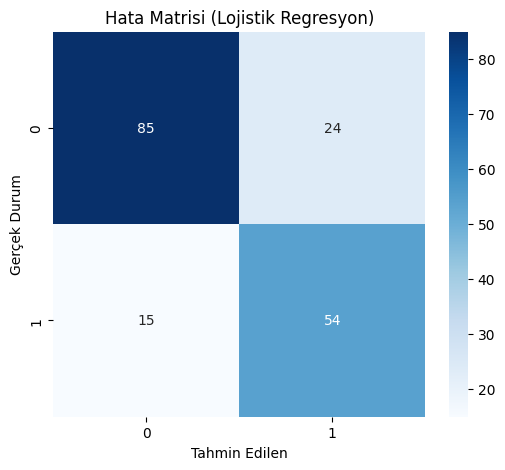

--- Detaylı Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# Lojistik Regresyon modelinin hata matrisini oluşturuyoruz
cm = confusion_matrix(y_test, tahmin_lr)

# Isı haritası (Heatmap) olarak çizdiriyoruz
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Hata Matrisi (Lojistik Regresyon)')
plt.ylabel('Gerçek Durum')
plt.xlabel('Tahmin Edilen')
plt.show()

# Detaylı raporu metin olarak yazdıralım
print("--- Detaylı Sınıflandırma Raporu ---")
print(classification_report(y_test, tahmin_lr))

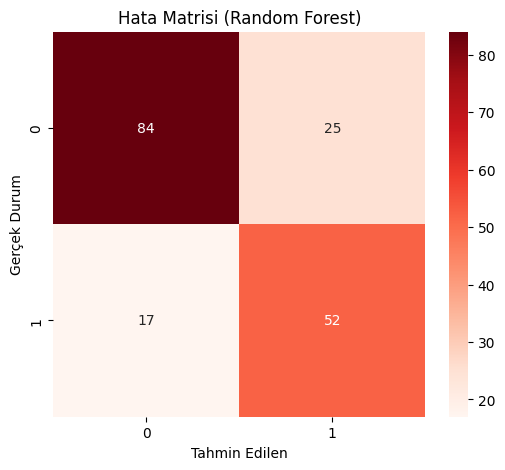

--- Random Forest Detaylı Rapor ---
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       109
           1       0.68      0.75      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.76      0.77       178



In [8]:
# Random Forest modelinin hata matrisini oluşturuyoruz
cm_rf = confusion_matrix(y_test, tahmin_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds') # Farklı olsun diye Kırmızı (Reds) yaptık
plt.title('Hata Matrisi (Random Forest)')
plt.ylabel('Gerçek Durum')
plt.xlabel('Tahmin Edilen')
plt.show()

# Detaylı raporu metin olarak yazdıralım
print("--- Random Forest Detaylı Rapor ---")
print(classification_report(y_test, tahmin_rf))